# Investment Analysis Assignment
## Project Brief

 Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in 
investments so that she can take the investment decisions effectively.

Spark Funds has two minor constraints for investments:

-It wants to invest between 5 to 15 million USD per round of investment

-It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

## Checkpoint 1: Data Cleaning 1

* Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [100]:
#read companies.txt
import numpy as np
import pandas as pd

companies=pd.read_csv("C:/Users/212575208/Documents/personal/IIITB/2.Statistics Essential/InvestmentAssignment/companies.txt",sep="\t", encoding = "ISO-8859-1") #Read the the dta from txt file to dataframe

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [101]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [102]:
#read rounds2.csv
rounds2=pd.read_csv("C:/Users/212575208/Documents/personal/IIITB/2.Statistics Essential/InvestmentAssignment/rounds2.csv",encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [103]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [104]:
#unique companies in rounds2
rounds2['company_permalink']=rounds2['company_permalink'].str.upper()
rounds2['company_permalink'].unique().shape

(66370,)

In [105]:
# convert permalink to upper case to avoid duplicates
companies['permalink']=companies['permalink'].str.upper()
companies.isnull().any()

permalink        False
name              True
homepage_url      True
category_list     True
status           False
country_code      True
state_code        True
region            True
city              True
founded_at        True
dtype: bool

In [106]:
#unique companies in companies
len(companies['permalink'].unique().tolist()) 

66368

In [107]:
#rename rounds2 column as permalink to perform merge
rounds2.rename(columns={"company_permalink":"permalink"},inplace=True)

In [108]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame
master_frame=pd.merge(rounds2,companies,how='inner',on='permalink') 
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00","(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,"41,250.00",01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,"43,360.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,"719,491.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,"3,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [109]:
# number of observations present in master_frame
master_frame.shape 

(114942, 15)

## Checkpoint 2: Funding Type Analysis

In [110]:
#column wise null values sum
master_frame.isnull().sum() 

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [111]:
# percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2) 

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [112]:
#funding_round_code is having 73 % null values ,which is huge so lets drop it
master_frame=master_frame.drop('funding_round_code',axis=1)

In [113]:
#column wise null values after dropping 'funding_round_code' column
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [114]:
#we can drop 'founded_at' column as we don't need this column for our analysis
master_frame=master_frame.drop('founded_at',axis=1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
dtype: float64

In [115]:
#rows having null values grater than 5
master_frame[master_frame.isnull().sum(axis=1)>5]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
201,/ORGANIZATION/2-LADOSHKI,/funding-round/e245ddd36b40591a00c3b861cfc0b154,seed,24-12-2013,nan,2 Ladoshki,NaN,NaN,operating,NaN,NaN,NaN,NaN
263,/ORGANIZATION/24-QUAN,/funding-round/47b438e969ebaa281c937bdcddc4b732,angel,01-05-2010,nan,24 Quan,NaN,Real Estate,operating,NaN,NaN,NaN,NaN
264,/ORGANIZATION/24-QUAN,/funding-round/935de9e6d394702193e1578a356ec0e9,venture,01-11-2011,nan,24 Quan,NaN,Real Estate,operating,NaN,NaN,NaN,NaN
275,/ORGANIZATION/24MED-SP,/funding-round/346594127162a8229bd16903735b1c2b,private_equity,01-01-2008,nan,24med Sp,NaN,NaN,closed,NaN,NaN,NaN,NaN
291,/ORGANIZATION/29WEST,/funding-round/d0e46e41cc809f8bda4c8357b9577635,undisclosed,15-03-2007,nan,29West,http://www.informatica.com/us/products/messagi...,NaN,acquired,NaN,NaN,NaN,NaN
346,/ORGANIZATION/2WEB-TECHNOLOGIES,/funding-round/79717b731ec29c98a7815661262af68d,angel,01-12-2001,nan,2Web Technologies,NaN,Software,acquired,NaN,NaN,NaN,NaN
366,/ORGANIZATION/30SECONDSTOFLY-CLAIRE,/funding-round/bae8338ab643cb209e7e46c54cc8ce03,undisclosed,30-09-2015,nan,30SecondsToFly - Claire,http://www.30secondstofly.com,NaN,closed,NaN,NaN,NaN,NaN
439,/ORGANIZATION/3D-FORMS,/funding-round/8c5b6e23472d2b157cf764ba926006a0,undisclosed,16-09-2013,nan,3D Forms,NaN,NaN,operating,NaN,NaN,NaN,NaN
455,/ORGANIZATION/3D-SIMO-2,/funding-round/4b62e1c7b8e61252af4fe6ca86109f7f,seed,01-12-2014,nan,3D simo,http://3dsimo.com,NaN,closed,NaN,NaN,NaN,NaN
510,/ORGANIZATION/3IS,/funding-round/179eeed3ce63eaac13a1f548d7e1dd20,venture,02-05-2008,nan,3IS,http://www.3isinc.com/,NaN,operating,NaN,NaN,NaN,NaN


In [116]:
#count of rows having null values grater than 5
len(master_frame[master_frame.isnull().sum(axis=1)>5]) 

1581

In [117]:
#removing NaN of raised_amount_usd rows
master_frame=master_frame[~np.isnan(master_frame['raised_amount_usd'])] 
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                 0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              4.56
category_list             1.10
status                    0.00
country_code              6.16
state_code                8.01
region                    7.42
city                      7.42
dtype: float64

In [118]:
#We have to consider 'raised_amount_usd' and as there are no values in this column we can go ahead and calculate average for each fund type
#Most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]
plot6_1=master_frame #we will need this dataframe in checkpoint 6 graph 1
pd.options.display.float_format = '{:,.2f}'.format
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity   73,308,593.03
venture          11,748,949.13
angel               958,694.47
seed                719,779.62
Name: raised_amount_usd, dtype: float64

In [119]:
# Visualization of Most representative value of the investment amount for each of the four funding types 
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity   73,308,593.03
venture          11,748,949.13
angel               958,694.47
seed                719,779.62
Name: raised_amount_usd, dtype: float64

Text(0.5,1,'INVESTMENT AMOUNT fOR EACH OF THE FOUR FUNDING TYPE')

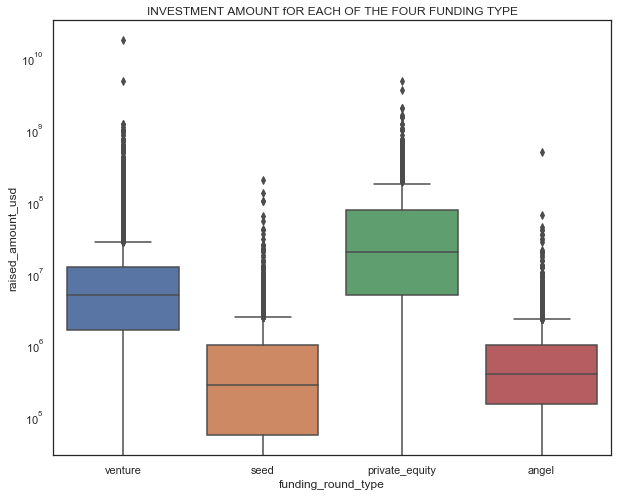

In [120]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.yscale('log')
plt.title("INVESTMENT AMOUNT fOR EACH OF THE FOUR FUNDING TYPE")

* From above plot we can see that private_equity have raised huge funds however,according to Spark Funds Contraints
  of investment we need the funds values between 5 to 15 million USD per investment round.
* So, next in list in venture which fits in 5 to 15 million USD  constarints.
* so,Venture is the most suitable fund to invest in.
* As we have decided to go with venture funding type lets restrict our data to that.

In [121]:
# master frame with only 'Venture' funding type
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture'])]

## Checkpoint 3: Country Analysis

* Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
* Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [122]:
#Country wise funds raised amount
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,907,514,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
SWE     3,254,952,563.00
NLD     2,939,403,619.00
CHE     2,827,560,264.00
SGP     2,793,917,856.00
ESP     1,835,831,452.00
BRA     1,785,986,890.00
IRL     1,676,131,350.00
RUS     1,570,426,005.00
AUS     1,322,934,948.00
DNK     1,228,310,641.00
BEL     1,070,542,301.00
FIN     1,043,199,709.00
NOR       956,192,413.00
KOR       939,988,262.00
MYS       883,058,787.00
HKG       781,266,982.00
AUT       630,954,952.00
TWN       623,979,485.00
TUR       559,097,457.00
ITA       488,289,353.00
NZL       448,316,383.00
             ...        
KWT        14,000,000.00
LIE        13,091,716.00
MNE        12,200,000.00
SVN        12,017,508.00
BGR        11,300,000.00
KAZ        11,000,000.00
GRC        10,743,775.00
BAH         8,900,000.00
TTO         

In [123]:
#We can see top nine countries in above result so lets restrict our master frame to only these countries
top9=master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
top9.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View


Text(0.5,1,'FUNDS RAISED In TOP 9 COUNTRIES')

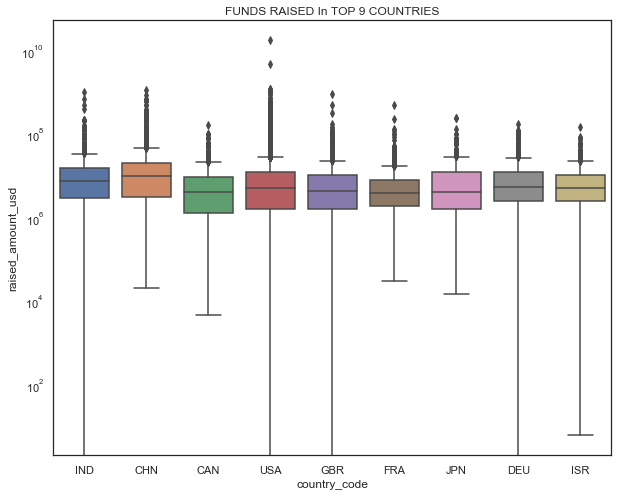

In [124]:
# Visualization of funds raised in Top 9 countries 
plt.figure(figsize=(10,8))
sns.boxplot(x='country_code',y='raised_amount_usd',data=top9)
plt.yscale('log')
plt.title("FUNDS RAISED In TOP 9 COUNTRIES")

In [125]:
# Identifying English-speaking countries from wiki link https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language 
EnglishCountry=pd.read_csv("C:/Users/212575208/Documents/personal/IIITB/2.Statistics Essential/InvestmentAssignment/EnglishCountry.csv",sep='\t',encoding = "ISO-8859-1")
EnglishCountry  

,CountryCode,IsOfficial
0,USA,Yes
1,GBR,Yes
2,CAN,Yes


In [126]:
TopEnglish=top9[top9['country_code'].isin(['USA','GBR','CAN'])]
TopEnglish.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.00
GBR    20,245,627,416.00
CAN     9,583,332,317.00
Name: raised_amount_usd, dtype: float64

In [127]:
#Top three English-speaking countries in the data frame top9.
Top3English=TopEnglish[TopEnglish['country_code'].isin(['USA','GBR','CAN'])]

In [128]:
Top3English.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino


### Checkpoint 4: Sector Analysis 1

In [129]:
#Extracting the primary sector of each category list from the 'category_list' column
Top3English['Primary_sec']=Top3English['category_list'].str.split('|').str[0]

In [130]:
#Reading mapping.csv
mapping=pd.read_csv("C:/Users/212575208/Documents/personal/IIITB/2.Statistics Essential/InvestmentAssignment/mapping.csv",encoding="ISO-8859-1")
mapping.dropna(subset=['category_list'],how='all',inplace=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [131]:
#Rename 'category_list' column to 'Primary_sec' im mapping dataframe 
mapping=mapping.rename(columns={'category_list':'Primary_sec'})
Top3English['Primary_sec']=Top3English['Primary_sec'].str.lower()

In [132]:
mapping.head()

,Primary_sec,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [133]:
mapping['Primary_sec']=mapping['Primary_sec'].str.lower()

In [134]:
#Mapping of primary sector to main sector
# reference for melt function https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/
main_sec=pd.melt(mapping,id_vars=["Primary_sec"],var_name="main_sec")
main_sec=main_sec[main_sec.value !=0]
main_sec.head()

,Primary_sec,main_sec,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1


In [135]:
main_sec=main_sec.drop('value',axis=1)
map_prim_To_main=pd.merge(Top3English,main_sec,how='left',on='Primary_sec',indicator=True) 

In [136]:
map_prim_To_main=map_prim_To_main[map_prim_To_main['_merge']=='both']

In [137]:
map_prim_To_main=map_prim_To_main.drop('_merge',axis=1)

In [138]:
# Counting total main sectors after mapping
map_prim_To_main['main_sec'].unique().tolist()

['Cleantech / Semiconductors',
 'News, Search and Messaging',
 'Others',
 'Health',
 'Manufacturing',
 'Social, Finance, Analytics, Advertising',
 'Entertainment',
 'Automotive & Sports']

In [139]:
len(map_prim_To_main['main_sec'].unique().tolist())

8

In [140]:
#As the range of funding preferred by Spark Funds is 5 to 15 million USD.
#Drop rows with less than 5000000
map_prim_To_main=map_prim_To_main.drop(map_prim_To_main[(map_prim_To_main.raised_amount_usd<5000000)].index) 
#Drop rows with greater than 15000000
map_prim_To_main=map_prim_To_main.drop(map_prim_To_main[(map_prim_To_main.raised_amount_usd>15000000)].index) 

## Checkpoint 5: Sector Analysis 2

* Find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

In [141]:
#DataFrame for USA
D1=map_prim_To_main[map_prim_To_main['country_code'].isin(['USA'])]
#DataFrame for GBR
D2=map_prim_To_main[map_prim_To_main['country_code'].isin(['GBR'])]
#DataFrame for CAN
D3=map_prim_To_main[map_prim_To_main['country_code'].isin(['CAN'])]

In [142]:
D1.shape

(11149, 15)

In [143]:
D2.shape

(577, 15)

In [144]:
D3.shape

(394, 15)

In [145]:
#The total number (or count) of investments for each main sector
d1=D1.groupby('main_sec')['raised_amount_usd'].aggregate(['count','sum']) #USA
d1

,count,sum
main_sec,,
Automotive & Sports,167,"1,454,104,361.00"
Cleantech / Semiconductors,2297,"21,181,003,033.00"
Entertainment,580,"5,000,212,982.00"
Health,908,"8,200,859,357.00"
Manufacturing,799,"7,258,553,378.00"
"News, Search and Messaging",1563,"13,796,816,094.00"
Others,2923,"26,089,280,296.00"
"Social, Finance, Analytics, Advertising",1912,"16,680,695,048.00"


In [146]:
d2=D2.groupby('main_sec')['raised_amount_usd'].aggregate(['count','sum']) #GBR
d2

,count,sum
main_sec,,
Automotive & Sports,16,"167,051,565.00"
Cleantech / Semiconductors,127,"1,136,905,008.00"
Entertainment,54,"461,511,059.00"
Health,24,"214,537,510.00"
Manufacturing,42,"361,940,335.00"
"News, Search and Messaging",73,"615,746,235.00"
Others,143,"1,249,124,289.00"
"Social, Finance, Analytics, Advertising",98,"821,888,357.00"


In [147]:
d3=D3.groupby('main_sec')['raised_amount_usd'].aggregate(['count','sum']) #CAN
d3

,count,sum
main_sec,,
Automotive & Sports,2,"15,000,000.00"
Cleantech / Semiconductors,112,"1,015,887,607.00"
Entertainment,22,"154,022,068.00"
Health,20,"162,145,064.00"
Manufacturing,31,"237,633,071.00"
"News, Search and Messaging",46,"420,121,113.00"
Others,109,"926,137,962.00"
"Social, Finance, Analytics, Advertising",52,"443,343,073.00"


In [148]:
#Total number of investments in USA
D1['raised_amount_usd'].count()

11149

In [149]:
#Total amount of investment (USD) in USA
D1['raised_amount_usd'].sum()

99661524549.0

In [150]:
#Total number of investments in GBR
D2['raised_amount_usd'].count()

577

In [82]:
#Total amount of investment (USD) in GBR
D2['raised_amount_usd'].sum()

5028704358.0

In [151]:
#Total number of investments in CAN
D3['raised_amount_usd'].count()

394

In [152]:
# Total amount of investment (USD) in CAN
D3['raised_amount_usd'].sum()

3374289958.0

In [153]:
# Top sector (based on count of investments) in USA
D1.groupby('main_sec')['raised_amount_usd'].count().sort_values(ascending=False) 

main_sec
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [154]:
# Top sector (based on count of investments) in GBR
D2.groupby('main_sec')['raised_amount_usd'].count().sort_values(ascending=False) #GBR

main_sec
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [155]:
# Top sector (based on count of investments) in CAN
D3.groupby('main_sec')['raised_amount_usd'].count().sort_values(ascending=False) #CAN

main_sec
Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     52
News, Search and Messaging                  46
Manufacturing                               31
Entertainment                               22
Health                                      20
Automotive & Sports                          2
Name: raised_amount_usd, dtype: int64

In [156]:
#  For the top sector count-wise (point 3), which company received the highest investment in USA?
D1[D1['main_sec']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/ORGANIZATION/VIRTUSTREAM           64,300,000.00
/ORGANIZATION/CAPELLA               54,968,051.00
/ORGANIZATION/AIRTIGHT-NETWORKS     54,201,907.00
/ORGANIZATION/DECARTA               52,100,000.00
/ORGANIZATION/BLACK-DUCK-SOFTWARE   51,000,000.00
Name: raised_amount_usd, dtype: float64

In [157]:
#For the second-best sector count-wise (point 4), which company received the highest investment in USA?
D1[D1['main_sec']=='Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/ORGANIZATION/BIODESIX        75,300,000.00
/ORGANIZATION/TIGO-ENERGY     68,739,496.00
/ORGANIZATION/FORSIGHT-LABS   61,300,001.00
/ORGANIZATION/RHEONIX         56,124,758.00
/ORGANIZATION/SCIENERGY       55,375,423.00
Name: raised_amount_usd, dtype: float64

In [158]:
#  For the top sector count-wise (point 3), which company received the highest investment in GBR?
D2[D2['main_sec']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/ORGANIZATION/ELECTRIC-CLOUD            37,000,000.00
/ORGANIZATION/SENSAGE                   36,250,000.00
/ORGANIZATION/ENIGMATIC                 32,500,000.00
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES   29,000,000.00
/ORGANIZATION/OPENCLOUD                 27,972,766.00
Name: raised_amount_usd, dtype: float64

In [159]:
#For the second-best sector count-wise (point 4), which company received the highest investment in GBR?
D2[D2['main_sec']=='Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/ORGANIZATION/EUSA-PHARMA                                                     35,600,000.00
/ORGANIZATION/HORIZON-DISCOVERY                                               31,353,719.00
/ORGANIZATION/F-STAR-BIOTECHNOLOGISCHE-FORSCHUNGS-UND-ENTWICKLUNGSGES-M-B-H   29,132,906.00
/ORGANIZATION/ELIXENT                                                         25,000,000.00
/ORGANIZATION/TAKEDA-CAMBRIDGE                                                22,340,000.00
Name: raised_amount_usd, dtype: float64

In [160]:
#  For the top sector count-wise (point 3), which company received the highest investment in CAN?
D3[D3['main_sec']=='Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/ORGANIZATION/FRESCO-MICROCHIP      48,000,000.00
/ORGANIZATION/OSTARA                43,152,682.00
/ORGANIZATION/DIABLO-TECHNOLOGIES   35,500,000.00
/ORGANIZATION/ZYMEWORKS             34,100,000.00
/ORGANIZATION/ENGENE                31,150,000.00
Name: raised_amount_usd, dtype: float64

In [161]:
#For the second-best sector count-wise (point 4), which company received the highest investment in GBR?
D3[D3['main_sec']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/ORGANIZATION/QUICKPLAY-MEDIA        38,700,000.00
/ORGANIZATION/NEWSTEP                31,477,853.00
/ORGANIZATION/STRANGELOOP-NETWORKS   21,500,000.00
/ORGANIZATION/MOREGA                 20,000,000.00
/ORGANIZATION/LXDATA                 19,310,000.00
Name: raised_amount_usd, dtype: float64

## Checkpoint 6: Plots

* ### 6.1 A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


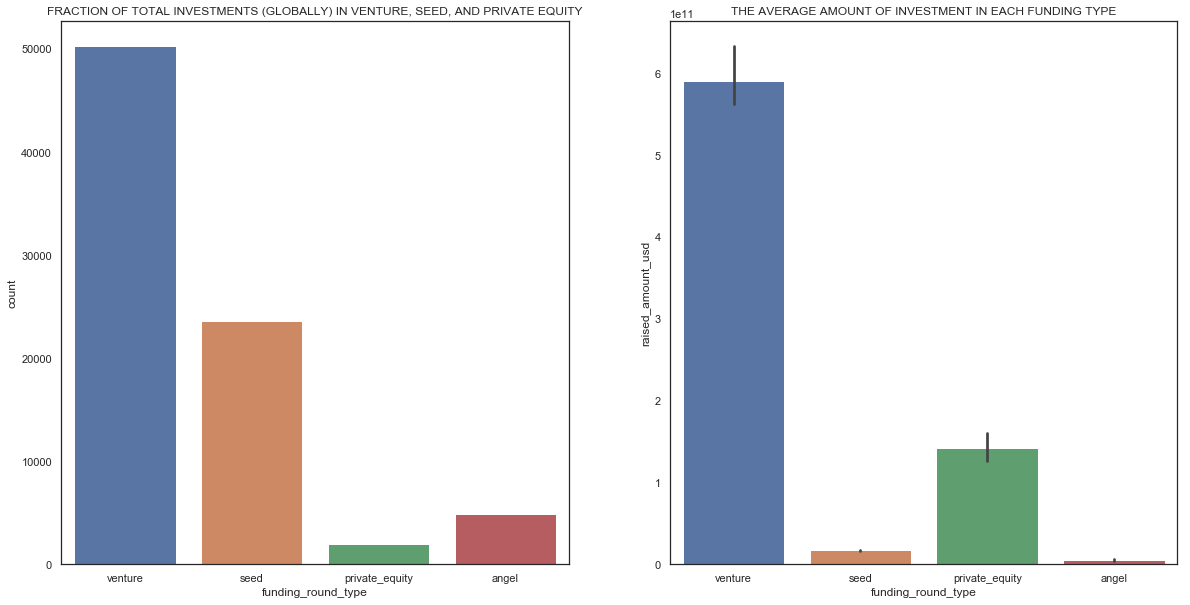

In [162]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x='funding_round_type',data=plot6_1)
plt.title('FRACTION OF TOTAL INVESTMENTS (GLOBALLY) IN VENTURE, SEED, AND PRIVATE EQUITY')
plt.subplot(1,2,2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=plot6_1,estimator=sum)
plt.title('THE AVERAGE AMOUNT OF INVESTMENT IN EACH FUNDING TYPE')
plt.show()

* ### 6.2 A plot showing the top 9 countries against the total amount of investments of funding type FT

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'TOP9 COUNTRIES INVESTMENTS IN VENTURE FUNDING TYPE')

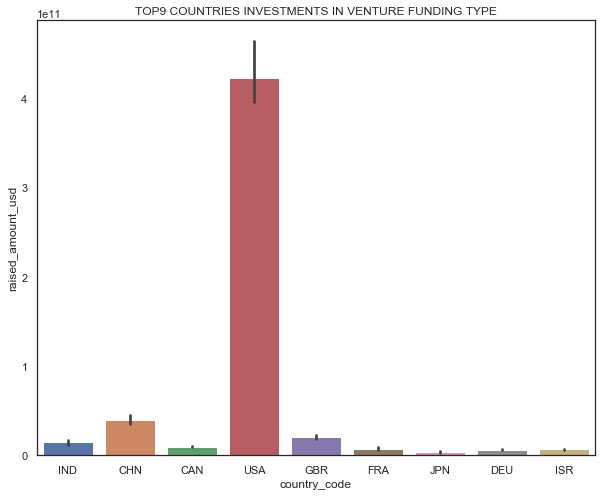

In [163]:
plt.figure(figsize=(10,8))
sns.barplot(x='country_code',y='raised_amount_usd',data=top9,estimator=sum)
plt.title('TOP9 COUNTRIES INVESTMENTS IN VENTURE FUNDING TYPE')

* ### 6.3 A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [164]:
USA=D1[D1['main_sec'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
GBR=D2[D2['main_sec'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
CAN=D3[D3['main_sec'].isin(['Cleantech / Semiconductors','Others','Social, Finance, Analytics, Advertising'])]

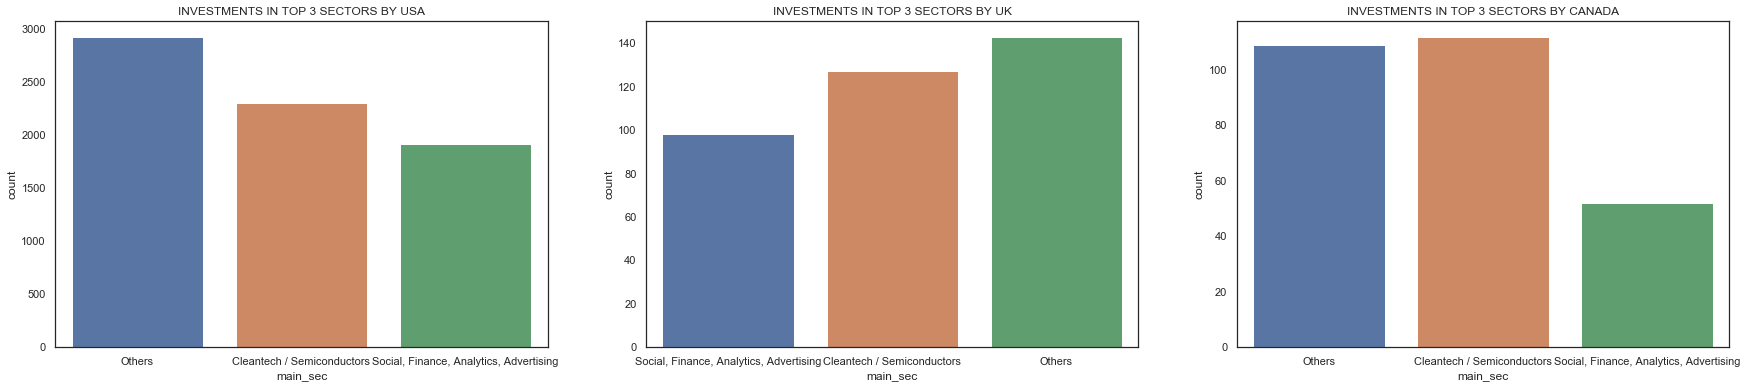

In [165]:
plt.figure(figsize=(30,6))

#USA plot
plt.subplot(1, 3, 1)
plt.title("INVESTMENTS IN TOP 3 SECTORS BY USA")
sns.countplot('main_sec',data=USA)
#GBR plot
plt.subplot(1, 3, 2)
plt.title("INVESTMENTS IN TOP 3 SECTORS BY UK")
sns.countplot('main_sec',data=GBR)
#CAN plot
plt.subplot(1, 3, 3)
plt.title("INVESTMENTS IN TOP 3 SECTORS BY CANADA")
sns.countplot('main_sec',data=CAN)